# Linear Regression


## Read dataset and normalize 

In [516]:
file = open("/home/vutaliy/Downloads/LR/1.txt", "r") 
m = int(file.readline())
m += 1

# Read train and find mins, maxs
def readset(objs, min_max_set, size):
    for i in range(size): 
        current_obj = file.readline().split()
        buff = []

        for j in range(len(current_obj)):
            x = float(current_obj[j])
            buff.append(x)
            
            if x < min_max_set[j][0]:
                min_max_set[j][0] = x

            if x > min_max_set[j][1]:
                min_max_set[j][1] = x

        objs.append(buff)

# Min max scaler
def min_max(objs, mins_and_maxs): 
    for i in range(len(objs)):
        for j in range(len(objs[0])):
            objs[i][j] = (objs[i][j] - mins_and_maxs[j][0]) / (mins_and_maxs[j][1] - mins_and_maxs[j][0]) if mins_and_maxs[j][1] - mins_and_maxs[j][0] !=0 else 0

# Add free coef
def add_free_coef(objs):
    for i in range(len(objs)):
        objs[i].append(1.0)
        objs[i][m], objs[i][m-1] = objs[i][m-1], objs[i][m]

# train
n = int(file.readline())
train = []
min_max_train = [[float("inf"), float("-inf")] for i in range(m) ]
readset(train, min_max_train, n)
min_max(train, min_max_train)
add_free_coef(train)

# test
k = int(file.readline())
test = []
min_max_test = [[float("inf"), float("-inf")] for i in range(m) ]
readset(test, min_max_test, k)
min_max(test, min_max_test)
add_free_coef(test)

train = np.array(train)
y_ans_train = train[:,len(train[0])-1]
train = train[:,:len(train[0])-1]

test = np.array(test)
y_ans_test = test[:,len(test[0])-1]
test = test[:,:len(test[0])-1]

## Functional assessment

In [377]:
def smape(preds_y, ans_y): # pls help me
    sum_ = 0
    for ix, pred in enumerate(preds_y):
        sum_ += abs(pred - ans_y[ix])/((abs(pred) + abs(ans_y[ix])/2))
    return 100 * (sum_ / len(preds_y))

def nmrse(preds_y, ans_y):
    sum_ = 0
    min_p = np.min(preds_y)
    max_p = np.max(preds_y)
    for ix, pred in enumerate(preds_y):
        sum_ += (pred - ans_y[ix]) ** 2
    return ((sum_ / len(preds_y)) ** 0.5) / (max_p - min_p) 

## Least square method

$w = (A^T*A)^{-1}*A^T*y\ classic\ solution\\ $
$A = U*D*V^T\ svd\\ $
$A+ = (A^T*A)^{-1}*A^T\ pseudoinv matrix\\ $
$A+ = (V*D*U^T*U*D*V^T)^{-1}*V*D*U^T\ (Ut*U = E\ orthogonal)\\ $
$A+ = (V*D*D*V^T)^(-1)*V*D*U^T\\ $
$A+ = (V^T)^{-1}*D^{-1}*D^{-1}*V^{-1}*V*D*U^T\\ $
$A+ = V*D^{-1}U^T\\ $
$w^* = (A^T*A + \lambda *E)^{-1}*A^T*y\ solution\ with\ regularization\\ $
$w^* = V*(D^2 + \lambda *E)^{-1})*D*U^T*y\ ==\  y*U*(D^2 + lmbd*E)^{-1})*V^T$

In [544]:
import numpy as np
u, s, vt = np.linalg.svd(train, full_matrices=False)

def lsm():
    buff1 = []
    buff2 = []
    for i in range(0, 100000, 100):
        lmbd = 0.1 * i
        
        # classic # w = np.dot(np.dot(np.linalg.inv(np.dot(train.T, train) + lmbd * np.eye(train.shape[1])), train.T), y_ans_train)
        # swap matrices # w = np.dot(y_ans_train, np.dot(np.dot(np.dot(u, np.linalg.inv(np.diag(s ** 2) + lmbd * np.eye(s.shape[0]))), np.diag(s)), vt))
        w = np.dot(np.dot(np.dot(np.dot(vt.T, np.linalg.inv(np.diag(s ** 2) + lmbd * np.eye(s.shape[0]))), np.diag(s)), u.T), y_ans_train)
        # w.shape
        y_preds = np.dot(test, w)
        buff1.append(lmbd)
        buff2.append(nmrse(y_preds, y_ans_test))

    return buff1, buff2

lmbds, errs = lsm()


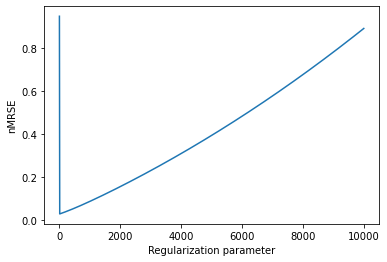

In [545]:
import matplotlib.pyplot as plt

plt.xlabel("Regularization parameter")
plt.ylabel("nMRSE")
plt.plot(lmbds, errs)

## Batch gradient descent

### Help functions


In [571]:
# loss function 
def sq(x, w, y):
    return (sum(x * w) - y) ** 2 / 2

def dif_sq(x, w, y):
    return sum(x * w) - y

def empirical_risk(w, func, start, k):
    return sum([func(train[i], w, y_ans_train[i]) for i in range(start, start + k + 1)])


In [574]:
import random as rnd

amount = 1000
batch_size = train.shape[1]

def bgd(amount, batch_size, h = 2):
    start = rnd.randint(0, len(train) - batch_size - 1)
    weights = [rnd.uniform(-1/(2 * train.shape[1]), 1/(2 * train.shape[1])) for i in range(train.shape[1])]
    assessment = empirical_risk(weights, dif_sq, start, batch_size )


    for i in range(1, amount):
        weights -= h / i * empirical_risk(weights, dif_sq, rnd.randint(0, len(train) - batch_size - 1), batch_size)
        assessment = (1 - lmd)*assessment + lmd * 


bgd(amount, batch_size)


In [560]:
rnd.randint(len(train) - batch_size)

NameError: name 'batch_size' is not defined